<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5c.2,-verified-vs-unverified" data-toc-modified-id="5c.2,-verified-vs-unverified-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>5c.2, verified vs unverified</a></span></li><li><span><a href="#5b.2-Linechart" data-toc-modified-id="5b.2-Linechart-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>5b.2 Linechart</a></span></li><li><span><a href="#Duplication,-to-csv" data-toc-modified-id="Duplication,-to-csv-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Duplication, to csv</a></span></li><li><span><a href="#Dropping-nan-from-unique-list" data-toc-modified-id="Dropping-nan-from-unique-list-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dropping nan from unique list</a></span></li><li><span><a href="#read-csv-from-URL" data-toc-modified-id="read-csv-from-URL-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>read csv from URL</a></span></li><li><span><a href="#Expensive-neighbourhood-group" data-toc-modified-id="Expensive-neighbourhood-group-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Expensive neighbourhood group</a></span></li><li><span><a href="#Highlight-most-expensive" data-toc-modified-id="Highlight-most-expensive-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Highlight most expensive</a></span></li><li><span><a href="#Price-should-be-a-numerical-feature" data-toc-modified-id="Price-should-be-a-numerical-feature-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Price should be a numerical feature</a></span></li></ul></div>

Please declare filepath here

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/airbnb_sample.csv")

In [3]:
df.shape

(10000, 26)

In [4]:
dff = df.sample(200)

In [5]:
dff.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
6122,54937297,Sweet room w/attached bath in center of Flushing.,75437692190,unconfirmed,Liqin,Queens,Flushing,40.75889,-73.82104,United States,...,$225,1.0,39.0,7/7/2019,3.49,3.0,9.0,342.0,NaN,NaN
4765,47958434,Spacious Parkside Abode,49657417071,unconfirmed,Caroline,Brooklyn,Flatbush,40.65206,-73.96149,United States,...,$48,4.0,5.0,11/9/2018,0.14,5.0,1.0,28.0,"There are real beds for eight, one pull out co...",NaN
1127,1327745,Lovely Apartment,86350704637,unconfirmed,Amy,Brooklyn,Prospect Heights,40.67424,-73.96665,United States,...,$184,5.0,24.0,6/23/2019,0.25,2.0,1.0,NaN,NaN,NaN
2575,48441697,Beautiful Studio on Tree-Lined St.,10943699984,verified,Liz,Manhattan,Chelsea,40.74583,-74.00451,United States,...,$152,4.0,30.0,7/1/2019,0.82,5.0,1.0,349.0,There is no smoking allowed anywhere on the pr...,NaN
5030,36438009,Cute and Cozy Private Room Close to the Subway,26969352210,unconfirmed,Jose,Queens,Ozone Park,40.67545,-73.85689,United States,...,$23,30.0,22.0,8/31/2021,0.38,4.0,2.0,8.0,NaN,NaN


### 5c.2, verified vs unverified

In [6]:
df.lat.mean()

40.72783387775977

In [7]:
df.groupby("host_identity_verified").lat.mean().round(2)

host_identity_verified
unconfirmed    40.73
verified       40.73
Name: lat, dtype: float64

In [8]:
df.groupby("host_identity_verified").long.mean().round(2)

host_identity_verified
unconfirmed   -73.95
verified      -73.95
Name: long, dtype: float64

In [9]:
import seaborn as sns

<AxesSubplot: xlabel='long', ylabel='lat'>

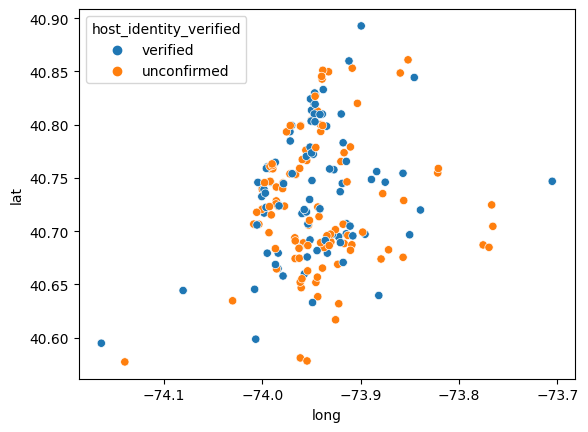

In [10]:
sns.scatterplot(x=dff.long, y=dff.lat, hue=df.host_identity_verified)

### 5b.2 Linechart

We may use Construction year

In [11]:
df[['instant_bookable', 'Construction year', 'calculated host listings count',
       'availability 365']].head()

,instant_bookable,Construction year,calculated host listings count,availability 365
0,True,2010.0,3.0,342.0
1,True,2011.0,1.0,354.0
2,False,2004.0,1.0,123.0
3,False,2003.0,2.0,365.0
4,True,2009.0,1.0,0.0


### Duplication, to csv

In [12]:
dff_no_dup = dff.drop_duplicates("host name")

In [13]:
dff_no_dup.shape

(188, 26)

In [14]:
dff_no_dup.to_csv("../datasets/airbnb_no_dup.csv", index=False)

### Dropping nan from unique list

Hi, how can I properly remove the "nan" in cancellationpolicy.unique(): which gives me => 'strict','moderate','flexible' , nan ? Thank you for your help😊

In [15]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [16]:
[n ** 2 for n in range(5)]

[0, 1, 4, 9, 16]

In [17]:
[elem for elem in df.cancellation_policy.unique() if pd.notna(elem)]

['strict', 'moderate', 'flexible']

In [18]:
# equivalent
df.cancellation_policy.dropna().unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

### read csv from URL

when we read the airbnb data, path is in our local machine. if you were to run again to test it, you will get error. Is there a way to read it through URL

Yes, we can read *in general* csvs from URL, but they have to be public

In [19]:
pokemon = pd.read_csv("https://raw.githubusercontent.com/sheriffff/teaching_ibm_skillup_data_analytics2023/main/datasets/pokemon.csv")

In [20]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In task 4, do I need to filter out the NULL cancellation policy for listing the number of activities and find the most strict cancellation policy?

Yes, you can filter out the nulls

In [21]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [22]:
df.shape

(10000, 26)

In [23]:
df_ok_cancel = df[df.cancellation_policy.notna()]

In [24]:
df_ok_cancel.shape

(9994, 26)

In [25]:
df_ok_cancel.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [26]:
df_ok_cancel.cancellation_policy.value_counts()

moderate    3390
strict      3320
flexible    3284
Name: cancellation_policy, dtype: int64

### Expensive neighbourhood group

Can you give us any tips on how to proceed to calculate and show which of the neighbourhood_group is the most expensive? Which process would be the better?

You may:
 - group by neighbourhood group then calculate median or average price
 - build one boxplot of price per neighbourhood
 - build one histogram per neighbourhood

In [27]:
df2 = df[["neighbourhood group", "price"]].copy()

In [28]:
df2.dtypes

neighbourhood group    object
price                  object
dtype: object

In [29]:
df2.head()

,neighbourhood group,price
0,Queens,$734
1,Brooklyn,$633
2,Brooklyn,"$1,107"
3,Queens,"$1,006"
4,Manhattan,$101


In [30]:
df2["neighbourhood group"].value_counts()

Manhattan        4213
Brooklyn         4138
Queens           1284
Bronx             265
Staten Island      99
Name: neighbourhood group, dtype: int64

### Highlight most expensive

task 4: how to highlight the most expensive neighborhood to rent from after getting the results using gruopby?

In [31]:
pokemon = pd.read_csv("../datasets/pokemon.csv")

In [32]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [33]:
pokemon_little = pokemon[pokemon["Type 1"].isin(['Grass', 'Fire', 'Water', 'Bug'])].copy()

In [34]:
pokemon_little["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug'], dtype=object)

In [38]:
pokemon_little.groupby("Type 1").Speed.median().sort_values()

Type 1
Grass    58.5
Bug      60.0
Water    65.0
Fire     78.5
Name: Speed, dtype: float64

In [41]:
order_speed = pokemon_little.groupby("Type 1").Speed.median().sort_values().index

In [42]:
order_speed

Index(['Grass', 'Bug', 'Water', 'Fire'], dtype='object', name='Type 1')

<AxesSubplot: xlabel='Type 1', ylabel='Speed'>

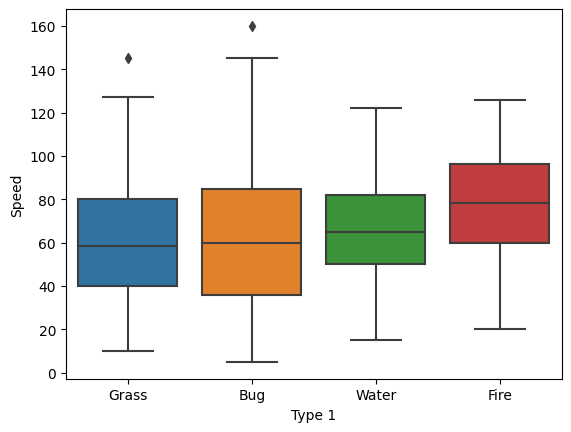

In [43]:
sns.boxplot(y=pokemon_little.Speed, x=pokemon_little["Type 1"], order=order_speed)

In [45]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

### Price should be a numerical feature

In [55]:
df.shape

(10000, 26)

In [57]:
df.price.head()

0      $734 
1      $633 
2    $1,107 
3    $1,006 
4      $101 
Name: price, dtype: object

In [58]:
df.price.dtype

dtype('O')

In [63]:
df.price = df.price.str.replace("$", "").str.replace(",", "").astype(float)

/tmp/ipykernel_10095/3350584771.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.price = df.price.str.replace("$", "").str.replace(",", "").astype(float)


In [64]:
df.price.dtype

dtype('float64')

In [65]:
df.price.mean()

628.690039121276

In [68]:
df.groupby("neighbourhood group").price.mean().round(1).sort_values()

neighbourhood group
Staten Island    609.1
Manhattan        624.2
Brooklyn         629.2
Queens           640.9
Bronx            643.4
Name: price, dtype: float64

In [73]:
df["service fee"]= df["service fee"].str.replace("$", "").str.replace(",", "").astype(float)

/tmp/ipykernel_10095/197254191.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["service fee"]= df["service fee"].str.replace("$", "").str.replace(",", "").astype(float)


<AxesSubplot: xlabel='price', ylabel='service fee'>

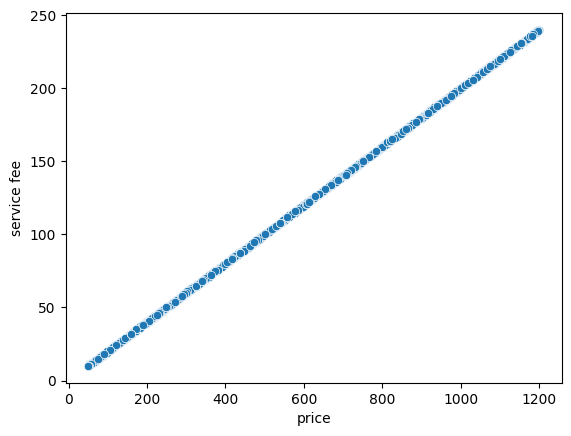

In [74]:
sns.scatterplot(x=df.price, y=df["service fee"])

In [76]:
df["service fee"] / df.price

0       0.200272
1       0.200632
2       0.199639
3       0.199801
4       0.198020
          ...   
9995    0.201258
9996    0.200000
9997    0.200717
9998    0.200846
9999    0.201389
Length: 10000, dtype: float64

In [75]:
df[["price", "service fee"]]

,price,service fee
0,734.0,147.0
1,633.0,127.0
2,1107.0,221.0
3,1006.0,201.0
4,101.0,20.0
...,...,...
9995,159.0,32.0
9996,1125.0,225.0
9997,558.0,112.0
9998,473.0,95.0
